## <center><font color=#154360>EDA
 - Continuation to Feature Engineering

---
# **Table of Contents**
---

**1.** [**Installing & Importing Libraries**](#Section1)<br>

**2.** [**Loading Data**](#Section2)<br>

**3.** [**Data Acquisition & Description**](./DataCleaning.ipynb)<br>

**4.** [**Data Pre-Processing**](./DataCleaning.ipynb)<br>

**5.** [**Feature Engineering Steps**](./FeatureEngineering.ipynb)<br>

**6.** [**Test Data Pre-Processing and Post-Processing**](./FeatureEngineering.ipynb)<br>

**7.** [**Test Data Pre-Processing and Post-Processing**](./FeatureEngineering.ipynb)

**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - **8.1** [**UNIVARIATE**](#Section81)<br>
  - **8.2** [**BIVARIATE**](#Section82)<br>
  - **8.3** [**MULTIVARIATE**](#Section83)<br>
  
**9.** [**Summarization**](#Section9)<br>
  - **9.1** [**Summary**](#Section91)<br>
  - **9.2** [**Conclusion**](#Section92)<br>
  - **9.3** [**Actionable Insights**](#Section93)<br>
    

---
<a name = Section1></a>
# **1. Importing Libraries**
---

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats
from scipy.stats import chi2_contingency



---
<a name = Section2></a>
# **2. Loading Data from processed CSV file**
---


In [194]:
emp_train=pd.read_csv('processed_train\emp_train.csv')


In [195]:
# Creating a Copy of the Dataset
empid_df=emp_train.copy(deep=True)

In [196]:
# Creating a Dataset without employee_id column
emp_train.drop(columns='employee_id', inplace=True)

In [197]:
emp_train.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'age', 'gender',
       'marital_status', 'salary', 'status', 'department'],
      dtype='object')

In [198]:
emp_train.describe()

avg_monthly_hrs  filed_complaint  last_evaluation    n_projects  \
count     11292.000000     11292.000000     11292.000000  11292.000000   
mean        199.945094         0.144793         0.712914      3.787106   
std          50.841614         0.351907         0.167422      1.249575   
min          49.000000         0.000000         0.316175      1.000000   
25%         155.000000         0.000000         0.566871      3.000000   
50%         199.000000         0.000000         0.715075      4.000000   
75%         245.000000         0.000000         0.856718      5.000000   
max         310.000000         1.000000         1.000000      7.000000   

       recently_promoted  satisfaction        tenure           age  
count       11292.000000  11292.000000  11292.000000  11292.000000  
mean            0.020634      0.618614      3.489798     32.967411  
std             0.142162      0.249672      1.456465      9.999779  
min             0.000000      0.040191      2.000000     22.000000  
25%             0.000000      0.448161      3.000000     24.000000  
50%             0.000000      0.647317      3.000000     29.000000  
75%             0.000000      0.822063      4.000000     41.000000  
max             1.000000      1.000000     10.000000     57.000000

**<font size=4, color=#196F3D> Interpretation**
        
-------------
    
    **age** 
- Employee as young as 22 years old worked and maximum age is 57 years.
- Average age is 32 years
    
    ------------
    
    **avg_monthly_hrs**
- Minimum Average Monthly Working hours are found as 49 whereas Longest is 310 working hours.
- Average working hours are 199 which is appox. 10 hours of productivity -A new feature can be created here
- 25% of the population has the max range of values from 49 to 155 working hours
    
    ------------

    **n_projects**
- Minimum Number of Projects taken is  1
- Max. Number of Projects completed is 7
- 50% of population has completed Below 5 projects 
    
    -----------
    
    **satisfaction**
- Average Satisfaction Level is 0.6 among Employees
  
    -----------
   **Tenure**
- Average Tenure is 3 years

    

-----
<a name = Section8></a>
 
# **8. Exploratory Data Analysis**
----

  <a name = Section81></a>
### **8.1 UNIVARIATE**

### 1. **Percentage Distribution of Target Feature** - PIE chart

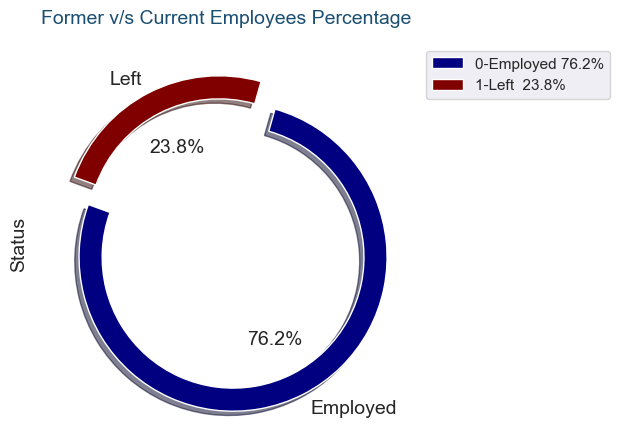

Employed    8600
Left        2692
Name: status, dtype: int64


In [199]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[5, 5])

# Exploding space based on the number of categories
space = np.ones(2)/10

# Using magic of pandas pie() function
emp_train['status'].value_counts().plot(kind='pie', explode=space, fontsize=14, 
                                       autopct='%3.1f%%', wedgeprops=dict(width=0.15), 
                                       shadow=True, startangle=160, cmap='jet', legend=True)

plt.ylabel(ylabel='Status', size=14)
plt.title(label='Former v/s Current Employees Percentage', color='#1B4F72', size=14,  pad=20)

plt.legend( bbox_to_anchor=(1, 1.02),labels=['0-Employed 76.2%','1-Left  23.8%'],loc='upper left')
plt.show()

print(emp_train['status'].value_counts())

**<font size=4, color=#196F3D>Interpretation: Former v/s Current Employees Percentage**
    
- **Employed and Former Employees Percentage is 76% and 23.8% resp.**
    
- **This may be treated for Imbalanced Class-Left**


### 2. **Percentage Contribution to Total Workforce by each Department** - PIE chart

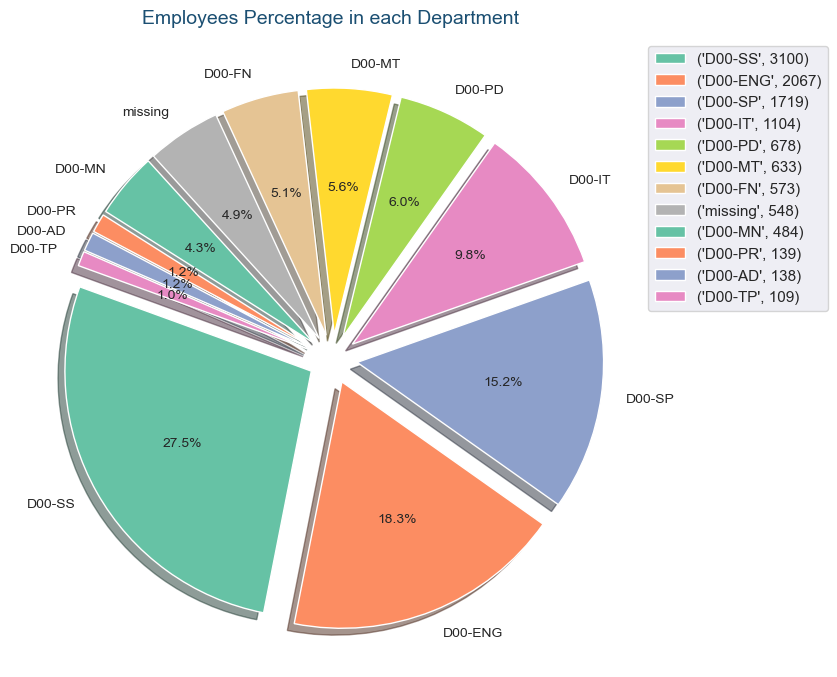

In [200]:
# Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[8, 8])
dept_values=emp_train.department.value_counts()
# Exploding space based on the number of categories
space = np.ones(12)/10

# Using magic of pandas pie() function
emp_train['department'].value_counts().plot(kind='pie', explode=space, fontsize=10, 
                                       autopct='%3.1f%%', 
                                       shadow=True, startangle=160, colors=sns.color_palette("Set2"), legend=True)

plt.ylabel(ylabel='', size=14)
plt.title(label='Employees Percentage in each Department ', color='#1B4F72', size=14,  pad=20)

plt.legend(bbox_to_anchor=(1, 1.02),labels=[items for items in dept_values.iteritems()],loc='best')
plt.show()

**<font size=4, color=#196F3D>Interpretation: Total Employees Percentage in Each department**
    
- **The biggest contribution to Employees(Ex-employees and Current Employees)Percentage is Sales Department with 27.5%**
- **3100 Employees are in Sales Dept, Engineering Dept has 2067 Employees and Support Dept has 1719 Employees**
- **Temp has least number of Employees**

### **3. Univariate Percentage Proportions Analysis for Each Independent Categorical Features**
- Gender
- marital_status
- filed_complaint
- recently_promoted

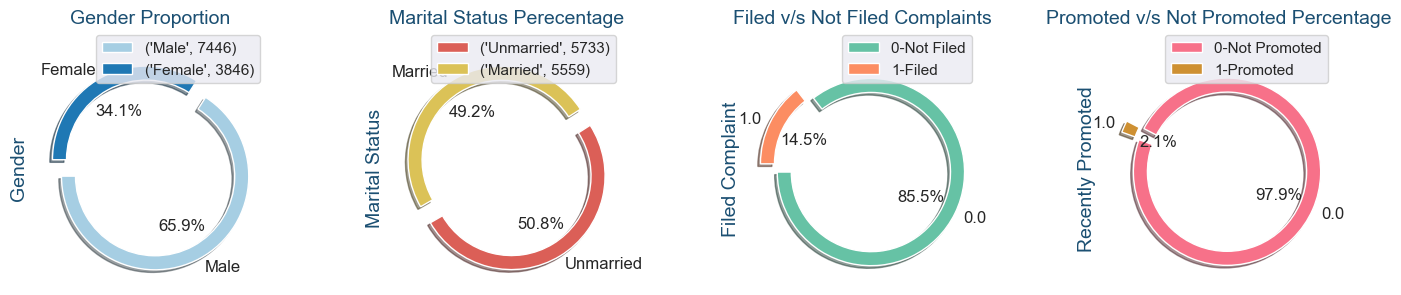

In [201]:
figure = plt.figure(figsize = [15, 7])

# Subplot for Gender
plt.subplot(1, 4, 1)

space = np.ones(2)/10
emp_train['gender'].value_counts().plot(kind='pie', explode=space, fontsize=12, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=180, figsize=[15, 7], colors=sns.color_palette("Paired"),
                                           legend=True)
plt.legend(bbox_to_anchor=(1, 1.10),labels=[items for items in emp_train['gender'].value_counts().iteritems()],loc='upper right')
plt.ylabel('Gender', size = 14,color='#1B4F72')
plt.title(label='Gender Proportion', color='#1B4F72', size=14,  pad=20)

# Subplot for marital_status
plt.subplot(1, 4, 2)
space = np.ones(2)/10
emp_train['marital_status'].value_counts().plot(kind='pie', explode=space, fontsize=12, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=210, figsize=[15, 7], colors=sns.color_palette("hls", 8),
                                           legend=True)
plt.legend(bbox_to_anchor=(1, 1.10),labels=[items for items in emp_train['marital_status'].value_counts().iteritems()],loc='upper right')
plt.ylabel('Marital Status', size = 14, color='#1B4F72')
plt.title(label='Marital Status Perecentage', color='#1B4F72', size=14,  pad=20)

# Subplot for filed_complaint
plt.subplot(1, 4, 3)
space = np.ones(2)/10
emp_train['filed_complaint'].value_counts().plot(kind='pie', explode=space, fontsize=12, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=180, figsize=[15, 7], colors=sns.color_palette('Set2'),
                                           legend=True)
plt.legend(bbox_to_anchor=(1, 1.10),labels=['0-Not Filed','1-Filed'],  loc='upper right')
plt.ylabel('Filed Complaint',color='#1B4F72', size = 14)
plt.title(label='Filed v/s Not Filed Complaints', color='#1B4F72', size=14,  pad=20)


# Subplot for recently_promoted
plt.subplot(1, 4, 4)
space = np.ones(2)/10
emp_train['recently_promoted'].value_counts().plot(kind='pie', explode=space, fontsize=12, 
                                           autopct='%3.1f%%', wedgeprops=dict(width = 0.15), 
                                           shadow=True, startangle=160, figsize=[15, 7],colors=sns.color_palette("husl", 8),
                                           legend=True)
plt.legend(bbox_to_anchor=(1, 1.10),labels=['0-Not Promoted','1-Promoted'],  loc='upper right')
plt.ylabel('Recently Promoted',color='#1B4F72', size = 14)
plt.title(label='Promoted v/s Not Promoted Percentage', color='#1B4F72', size=14,  pad=20)

plt.tight_layout(pad=5.0)
plt.show()

**<font size=4, color=#196F3D>Interpretation: Total Employees Percentage in Each department**
    
<u>Univariate Percentage Proportions Analysis for Each Independent Categorical Feature
    
- Male Female Distribution of the Population : 65.9% and 34.1%
- Marital Status Distribution of the Population : 50.8% and 49.2% 
- Not-Filed v/s Filed Complaint Distribution of the Population : 85.5% and 14.5%
- Not-Promoted v/s Recently_Promoted Distribution of the Population : 97.9% and 2.1%

- Employees Feedback is substantially less. This could have contributed to know their satisfaction level and eventually reason behind leaving.
- In the absence of good number of recordings for Filed Complaint Feature , we can reply on Satisfation feature
- Promotions are very less. Only 2.1 % got promoted in last 3 years.
----------------------------

### **4. Salary Percentage Proportions Analysis**
- Percent Bar Plot for Salary

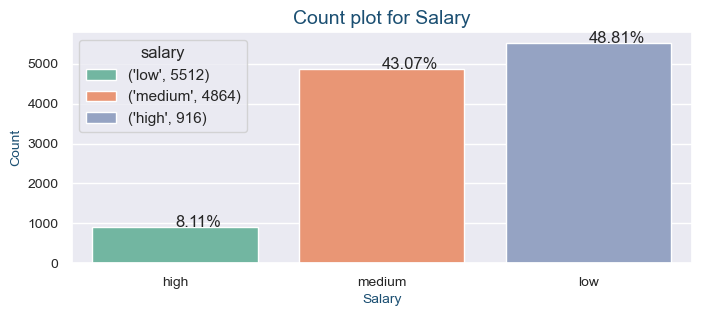

In [202]:

# Create a figure of 15 x 7 inches
fig = plt.figure(figsize=(8, 3))

# Create a countplot for Type feature
ax = sns.countplot(x=emp_train['salary'], data=emp_train, dodge=False,hue=emp_train['salary'])

# Adding percentages to the bars
total = emp_train['salary'].shape[0]
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() /2
    y = p.get_y() + p.get_height()
#     ax.annotate(p.get_height() ,(x,(p.get_y() + p.get_height()+5))
    ax.annotate(percentage, (x, y))
    ax.legend(title='salary', labels=[items for items in emp_train['salary'].value_counts().iteritems()])

# sns.legend (bbox_to_anchor = (1.2, 1), loc='upper right')
# Adding some cosmetics
plt.yticks(size=10)
plt.xticks(size=10)
plt.xlabel(xlabel="Salary", size=10, color='#1B4F72')
plt.ylabel(ylabel='Count', size=10, color='#1B4F72')
plt.title(label="Count plot for Salary", size=14, color='#1B4F72')

# plt.grid(b=True)

# Display the output
plt.show()

**<font size=4, color=#196F3D>Interpretation: Total Employees Percentage in Each department**
- Pay Scale Category %age Distibution constitutes 48.81% low salaries and 43.07% medium salaries
- High Salaried are only 8.11%
    
---------------------------------------

### **4. Univariate Analysis for Continuous Variables**
**Boxplot for :**
- 'age' 
- 'avg_monthly_hrs'
- 'last_evaluation'
- 'n_projects'
- 'satisfaction'
- 'tenure'


In [203]:
temp_df=emp_train.drop(columns=['status'])
temp_conti=temp_df.select_dtypes(exclude='object')


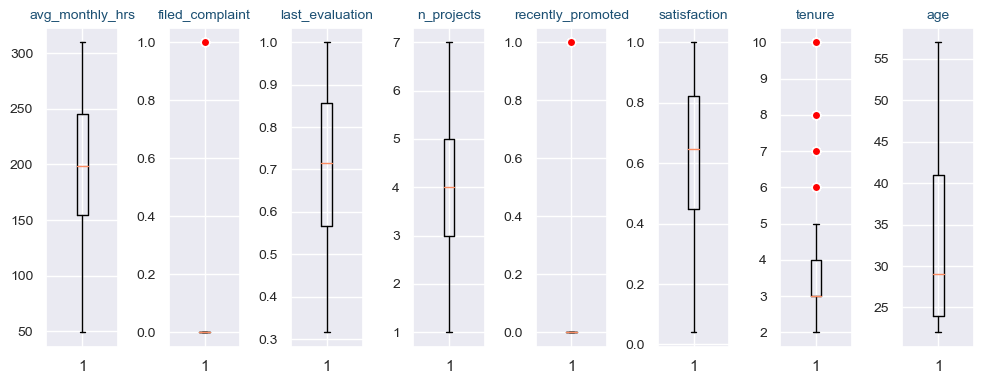

In [204]:

red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')
fig, axes = plt.subplots(1, len(temp_conti.columns),  figsize=(10,4))

#create boxplot in each subplot

for i, ax in enumerate(axes.flat):
    ax.boxplot(temp_conti.iloc[:,i], flierprops=red_circle)
    ax.set_title(temp_conti.columns[i], fontsize=10,color='#1B4F72' )
    ax.tick_params(axis='y', labelsize=10)
    
     
plt.tight_layout()


**<font size=4, color=#196F3D>Interpretation: Univariate Analysis for Continuous Variables**

  ------------
    
    **age**    
- Employee as young as 22 years old worked and maximum age is 57 years.
- Average age is 32 years and median as 29 Yearsb
   
    ------------
    
    **avg_monthly_hrs**
- Minimum Average Monthly Working hours are found as 49 whereas Longest is 310 working hours.
- Average working hours are 199 which is appox. 10 hours of productivity -A new feature can be created here
- 25% of the population has the max range of values from 49 to 155 working hours
    
    ------------
    
    **last_evaluation**
- last_evaluation has points as low as 0.3 and as high as 1 with an average of approx. 0.7 rating
    
    ------------

    **n_projects**
- Minimum Number of Projects taken is  1
- Max. Number of Projects completed is 7
- Approx. 50% of the population completed projects less than 5
    
    -----------
    
    **satisfaction**
- Average Satisfaction Level is 0.6 among Employees
  
    -----------
    
   **Tenure**
- Average Tenure is 3 years
    
    -------------
    -------------


<a name = Section82></a>
## **8.2. Bivariate**

### 1. Count Plots for Categorical and other Features w.r.t Status 
    'department'         : Count Plot of Left/Employed status in each Department
    'gender'            : Count Plot of Left/Employed status for Male/Female
    'tenure'(cont.)     : Count Plot of Left/Employed status for Tenure-Term
    'n_projects'(cont.) : Count Plot of Left/Employed status wr.t Number of Projects Taken
    'marital_status'    : Count Plot of Left/Employed status wr.t Marital Status
    'salary'            : Count Plot of Left/Employed status wr.t Salary

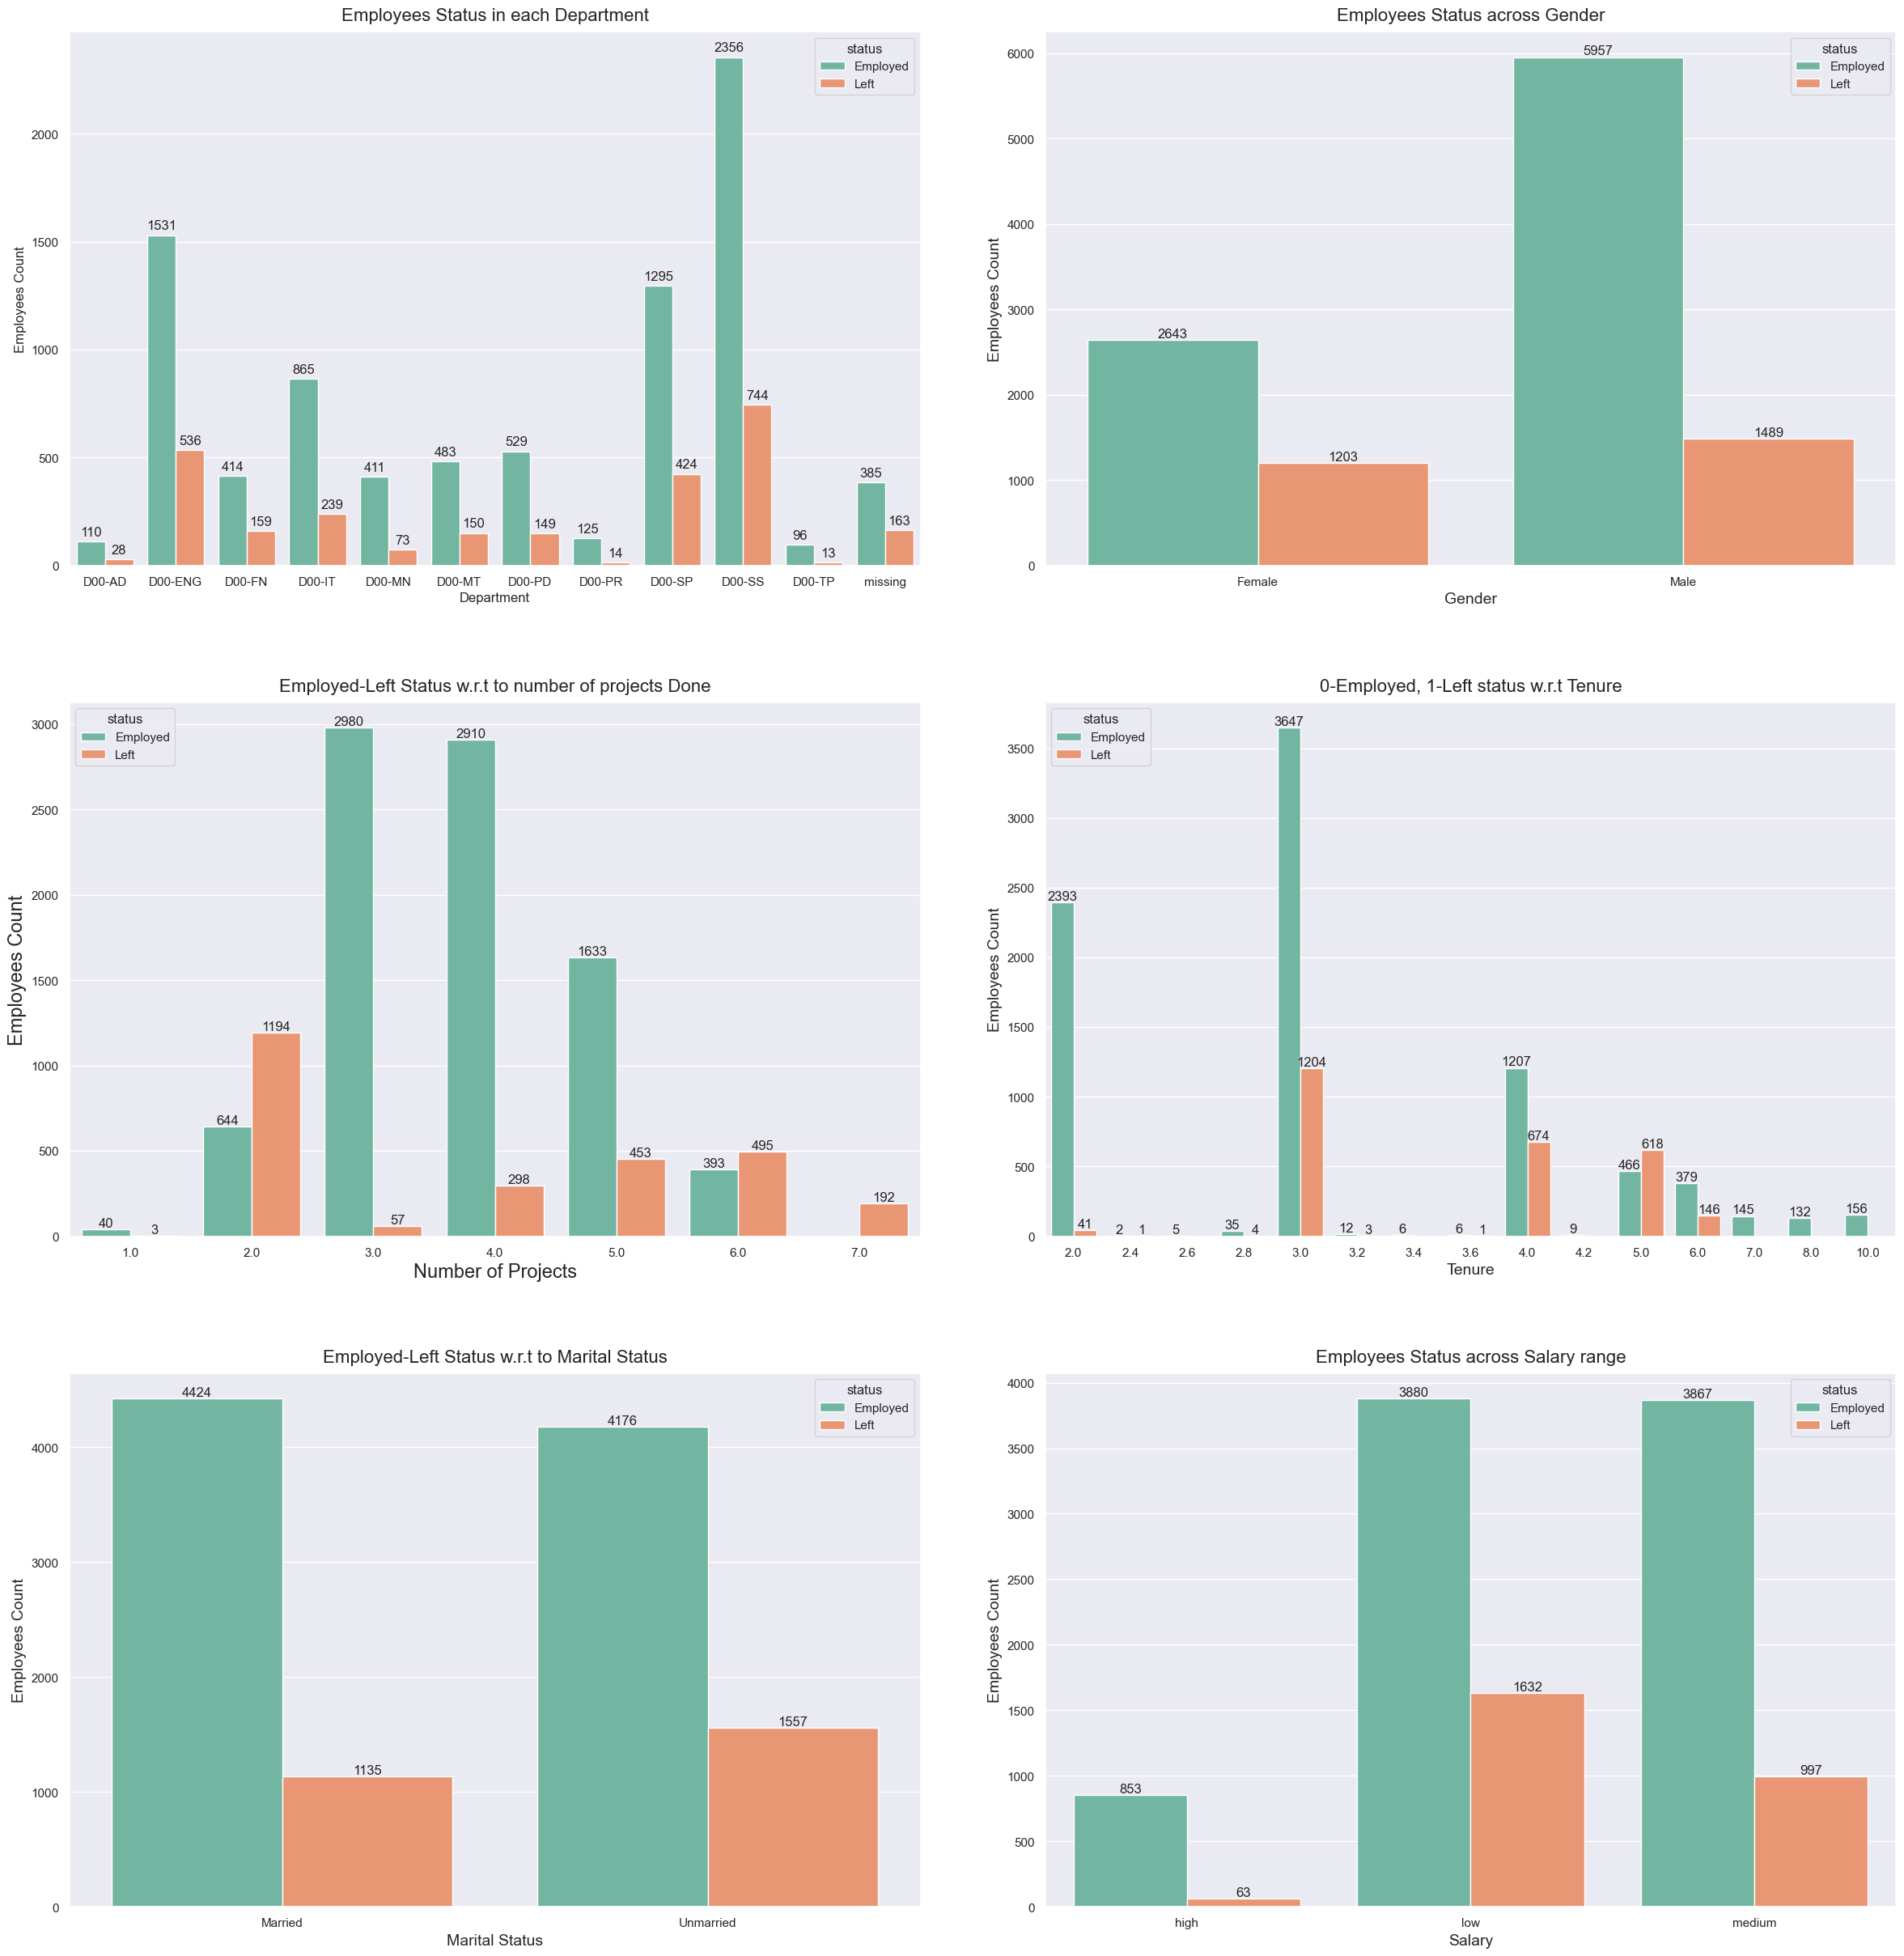

In [205]:

temp_train=empid_df[['employee_id','department','gender','tenure','n_projects','marital_status','salary','status']]



# figure = plt.figure(figsize = [15, 7])
fig, ax = plt.subplots(figsize=[25, 50])
# Distribution of Employees working or Left in each Department

deptname=temp_train.groupby(['department','status'])['employee_id'].count().reset_index()

plt.subplot(6, 2, 1)
sns.set_theme(palette="Set2")
ax=sns.barplot(x='department', y='employee_id', hue='status',data=deptname, ci=False)
for i in ax.containers:
    ax.bar_label(i,padding=3)
    
plt.xlabel('Department', size = 12)
plt.ylabel('Employees Count', size = 12)
plt.title('Employees Status in each Department', size = 16, pad=10)


# Employees Status across Gender
gender=temp_train.groupby(['gender','status'])['employee_id'].count().reset_index()
plt.subplot(6, 2, 2)
ax=sns.barplot(x='gender', y='employee_id', hue='status', data=gender,  ci=False)
for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Gender', size = 14)
plt.ylabel('Employees Count', size = 14)
plt.title('Employees Status across Gender', size = 16, pad=10)


# Employed-Left Status w.r.t to number of projects Done
nprojects=temp_train.groupby(['n_projects','status'])['employee_id'].count().reset_index()
nprojects.replace(6.999999999999999,7.0, inplace=True)
plt.subplot(6, 2, 3)
ax=sns.barplot(x='n_projects', y='employee_id', hue='status',data=nprojects, ci=False)

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel('Number of Projects', size = 17)
plt.ylabel('Employees Count', size = 17)
plt.title('Employed-Left Status w.r.t to number of projects Done', size = 16, pad=10)

# Price vs stories
tenure=temp_train.groupby(['tenure','status'])['employee_id'].count().reset_index()
plt.subplot(6, 2, 4)
ax=sns.barplot(x='tenure', y='employee_id',hue='status', data=tenure, ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Tenure', size = 14)
plt.ylabel('Employees Count', size = 14)
plt.title('0-Employed, 1-Left status w.r.t Tenure', size = 16,pad=10)



# Employed-Left Status w.r.t to Marital Status
marital=temp_train.groupby(['marital_status','status'])['employee_id'].count().reset_index()
plt.subplot(6, 2, 5)
ax=sns.barplot(x='marital_status', y='employee_id', hue='status', data=marital, ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Marital Status', size = 14)
plt.ylabel('Employees Count', size = 14)
plt.title('Employed-Left Status w.r.t to Marital Status', size = 16, pad=10)

# Employees Status across Salary range
salary=temp_train.groupby(['salary','status'])['employee_id'].count().reset_index()
plt.subplot(6, 2, 6)
ax=sns.barplot(x='salary', y='employee_id',  hue='status',data=salary, ci=False)
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel('Salary', size = 14)
plt.ylabel('Employees Count', size = 14)
plt.title('Employees Status across Salary range', size = 16, pad=10)
plt.tight_layout(pad=5.0)
plt.show()

**<font size=4, color=#196F3D>Interpretation: Total Employees Percentage in Each department**

    ----------
    
  **Department**
    
- **3100(27.5%) Employees are in Sales Dept, Engineering Dept has 2067(18.3%) Employees and Support Dept has 1719 (15.2%)Employees**
-  We can see the percentage Plot for these three departments w.r.t Employed/Left Status to know which Departments need to take care of Attrition Rate
    
    ----------
    
  **Gender**
- **Females have high Attrition Percentage in comparison to Males**
    
    ---------
    
  **n_projects**
- Employees who have **completed 2 Projects, have left**, count of **Left-Status is almost double than who are currently employed**
- Employees Left Status count who completed 5 and 6 Projects have nearly same count But The Left status count for employees with 6 projects has outnumbered the current working force with same skillset.
- **No Employees has been retained who have completed maximum of 7.0 projects**- check against Satisfaction level
    
    ----------
    
   **tenure**
- Very few number of Employees are leaving with 2 years of Experience
- Max. Employees in the Company are of 2, 3 and 4 years of Experience.
- Employees with 3, 4, 5, 6 years tenure can leave. 
- **With 5 years of exp. outnumbered** the count who are **currently employed** with same exp.
- With 7, 8 and 9 years of experience, employees are not leaving   
    
    ------------
    
    **marital_status**
- Unmarried are more frequent in leaving in comparison to Married though there is not significant difference.
    
    -----------
    **salary**
- Low Salaried Employees are more frequent in leaving than Medium and High Salaried ones
 

### 2. Employed/Left Percentage Status in Each department -Stacked

In [206]:
fig = go.Figure()

fig = px.histogram (  emp_train,
                      x="department",
                      color="status",
                      barnorm = "percent",
                      text_auto= True,
                      color_discrete_sequence=["yellow", "orange"],) \
        .update_layout (

                    title={
                            "text": "Employed/Left Percentage Status in Each department",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')

fig.show()




**<font size=4, color=#196F3D>Interpretation: Employed/Left Percentage Status in Each department**
- Attrition Percentage in Procurement and Temp Department is lesser compared to other other departments
- The Temp and Procurement Departments have smaller workforce compared to others
- Employees Attrition percentage is **maximum in Finance dept with 27.7% attrition rate**, **following that 25.9% in Engineering and approx. 24% in both the Sales and Support Departments** resp.



### 3. Satisfaction Level across Each department - Box Plot

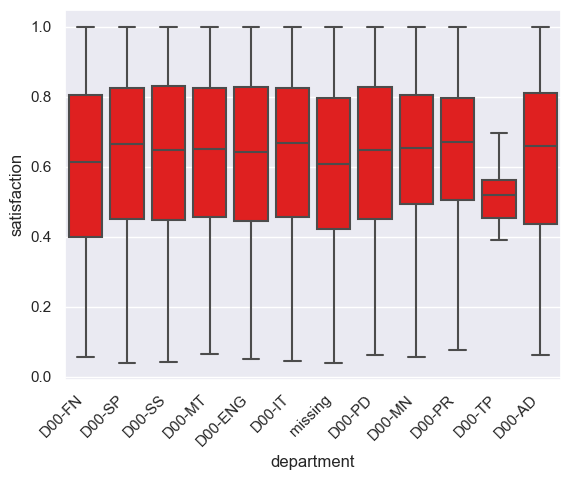

In [207]:
sns.boxplot(
    x='department', 
    y='satisfaction', 
    data=emp_train, 
    color='red')
plt.xticks(rotation=45, 
           ha='right');

**<font size=4, color=#196F3D>Interpretation: Satisfaction Level across Each department**
    
- All the Departments have almost 0.6 Satisfaction Rating except Temporary Department which has around 0.5 satisafction rating
    
    ---------

### 4. Satisfaction Level amongst Low, Medium and High Salaried - Box Plot

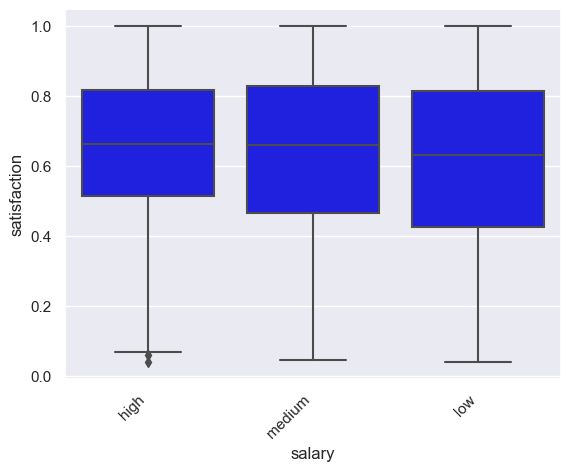

In [208]:
sns.boxplot(
    x='salary', 
    y='satisfaction', 
    data=emp_train, 
    color='blue')
plt.xticks(rotation=45, 
           ha='right');

In [209]:
fig = go.Figure()

fig = px.histogram (  emp_train,
                      x="salary",
                      color="status",
                      barnorm = "percent",
                      text_auto= True,
                      color_discrete_sequence=["seagreen", "orange"],) \
        .update_layout (

                    title={
                            "text": "Employed/Left Percentage Status in Each department",
                            "x": 0.5
                          },

                    yaxis_title="Percent"
                ) \
        .update_xaxes(categoryorder='total descending')

fig.show()


**<font size=4, color=#196F3D>Interpretation:Satisfaction Level amongst Low, Medium and High Salaried - Box Plot**
    
- It is almost Same. 
- But the visualization shows small difference in satisfaction level
    - It is **Low Salaried Satisfaction < 'Medium Salaried Satisfaction' < 'High Salaried Satisaction'**, though there are outliers that shows minimum satisfaction in High Salaried. This could be treated as an exception

### 5. Satisfaction Level in Males and Females - Box Plot

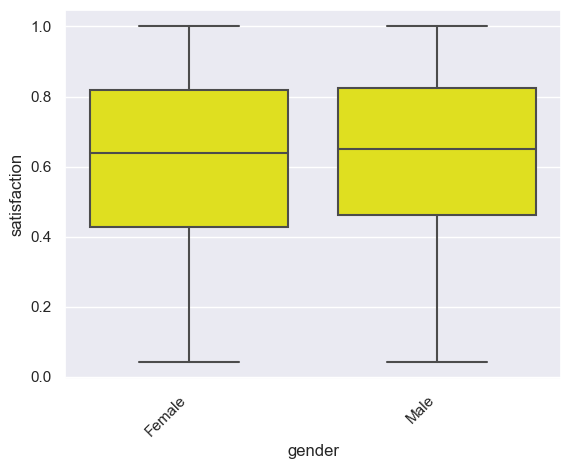

In [210]:
sns.boxplot(
    x='gender', 
    y='satisfaction', 
    data=emp_train, 
    color='yellow')
plt.xticks(rotation=45, 
           ha='right');

**<font size=4, color=#196F3D>Interpretation: Satisfaction Level in  in Males and Females**

- Almost Equally Satisfied
    
--------------------------------------------------------

### 6. Satisfaction Level amongst Married and Unmarried - Box Plot

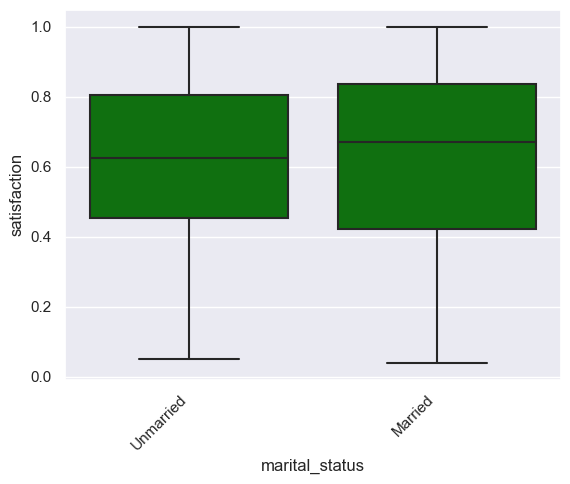

In [211]:
sns.boxplot(
    x='marital_status', 
    y='satisfaction', 
    data=emp_train, 
    color='green')
plt.xticks(rotation=45, 
           ha='right');

**<font size=4, color=#196F3D>Interpretation: Satisfaction Level amongst Married and Unmarried**

- More or Less Equally Satisfied

### 7. Recently Promoted w.r.t Status

Who Recently Promoted? 
 Employed    219
Left         14
Name: status, dtype: int64

 Who were not Promoted? 
 Employed    8381
Left        2678
Name: status, dtype: int64


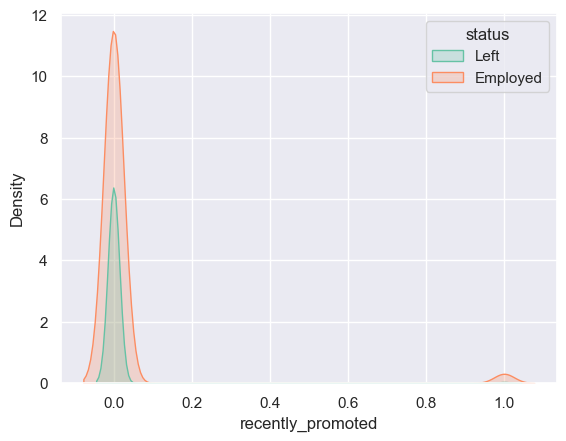

In [212]:
sns.kdeplot(data=emp_train, x='recently_promoted',hue='status', shade=True)

print("Who Recently Promoted? \n",emp_train[emp_train['recently_promoted']==1.0]['status'].value_counts())
print("\n Who were not Promoted? \n",emp_train[emp_train['recently_promoted']==0.0]['status'].value_counts())

**<font size=4, color=#196F3D>Interpretation: Recently Promoted w.r.t Status**
- Represents Very less promotions 
    
    **Who Left?**
- **Only 14 were promoted, which later left**
- **Majority of the Employees who left were never promoted**
    
    
------------------------------------

### 8. Filed Complaints w.r.t Status

Who Filed Complaint? 
 Employed    1514
Left         121
Name: status, dtype: int64

 Who did not file complaint? 
 Employed    7086
Left        2571
Name: status, dtype: int64


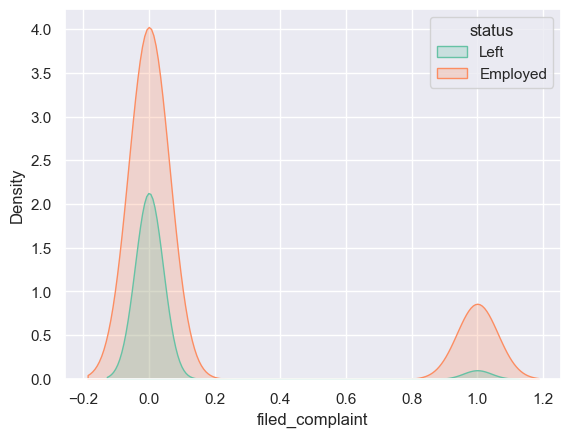

In [213]:
sns.kdeplot(data=emp_train, x='filed_complaint',hue='status', shade=True)

print("Who Filed Complaint? \n",emp_train[emp_train['filed_complaint']==1.0]['status'].value_counts())
print("\n Who did not file complaint? \n",emp_train[emp_train['filed_complaint']==0.0]['status'].value_counts())

**<font size=4, color=#196F3D>Interpretation: Filed Complaints w.r.t Status**
- Though very few Complaints but the employees still retained even after filing the complaints
    
**Who Left?**
- Employees who left belonged to category who did not file a complaint 
------------------------------------

### 9. Average Monthly Hours for Left/Employed Status

<AxesSubplot:xlabel='status', ylabel='avg_monthly_hrs'>

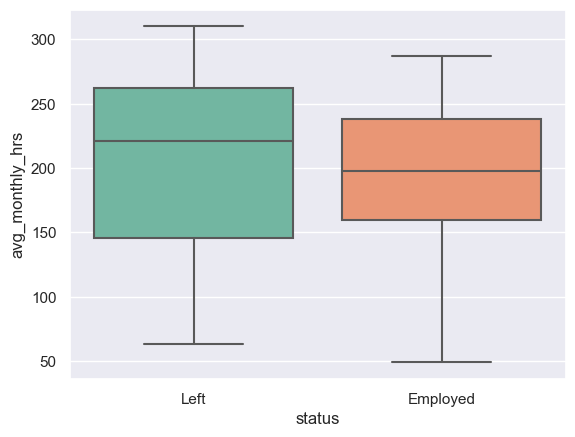

In [214]:
sns.boxplot(y=emp_train.avg_monthly_hrs,x=emp_train.status)

**<font size=4, color=#196F3D> Interpretation:Average Monthly Hours for Left/Employed Status**
**Who Left?**
- Employees who have left worked for long Hours with median as 225 Avg. monthly working hours  and max. of more than 300 working hours
- 50% population who left worked for 60- 225 hours
- **Other 50% population who left worked for 225 to 310 hoours**
    
- **50% of the Employed Workforce worked for 200 to less than 300 hours** 
  
------------------------------------

### 10. Number of Projects for Left/Employed Status

<AxesSubplot:xlabel='status', ylabel='n_projects'>

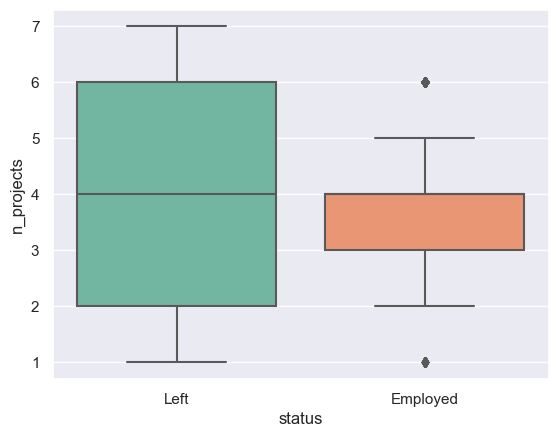

In [215]:
sns.boxplot(y=emp_train.n_projects,x=emp_train.status)

**<font size=4, color=#196F3D>Interpretation:  Number of Projects for Left/Employed Status**
   **Who Left?** 
- Employees who left took Varied Range of Projects (as low as 1, max.7) with an average of 4 Projects
- Very less number of current workforce took as many as 6 projects

### 11. Satisfaction for Left/Employed Status

<AxesSubplot:xlabel='satisfaction', ylabel='Density'>

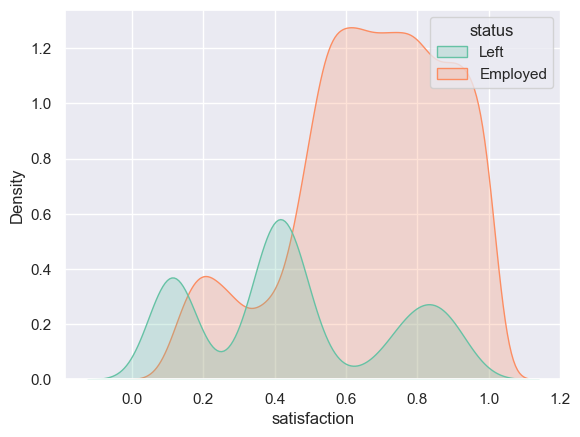

In [216]:
sns.kdeplot(data=emp_train, x='satisfaction',hue='status', shade=True)

**<font size=4, color=#196F3D>Interpretation:  Satisfaction for Left/Employed Status**
    
**Who Left?**
- Satisfaction for Left Employees have varied Score range from 0.0 to 1.0    
- **Maximum Employees Left when they had a satisfaction of 0.0 to 0.5 and 0.8 to 1.0**
 
**Satisfaction Level of Current Employees** 
- **Max. Employed Workforce** has a **satisfaction**score of **0.5 to 1.0**, 
  **very few with 0.2 or 0.3 score are still employees**

    
------------------------------------

### 12. KDE Plot for last_evaluation for Left/Employed Status

<AxesSubplot:xlabel='last_evaluation', ylabel='Density'>

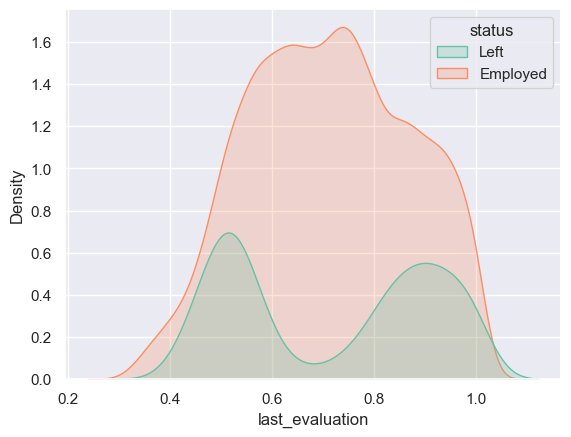

In [217]:
sns.kdeplot(data=emp_train, x='last_evaluation',hue='status', shade=True)

**<font size=4, color=#196F3D>Interpretation: KDE Plot for last_evaluation for Left/Employed Status**
    
**Who Left?**
    
- last_evaluation scores range from 0.4 to 1.0.
- Though it is max. for 0.5 and 0.9 scores
    
------------------------------------

### 13. Reg Plot between Tenure and No of Projects for Employed/Left

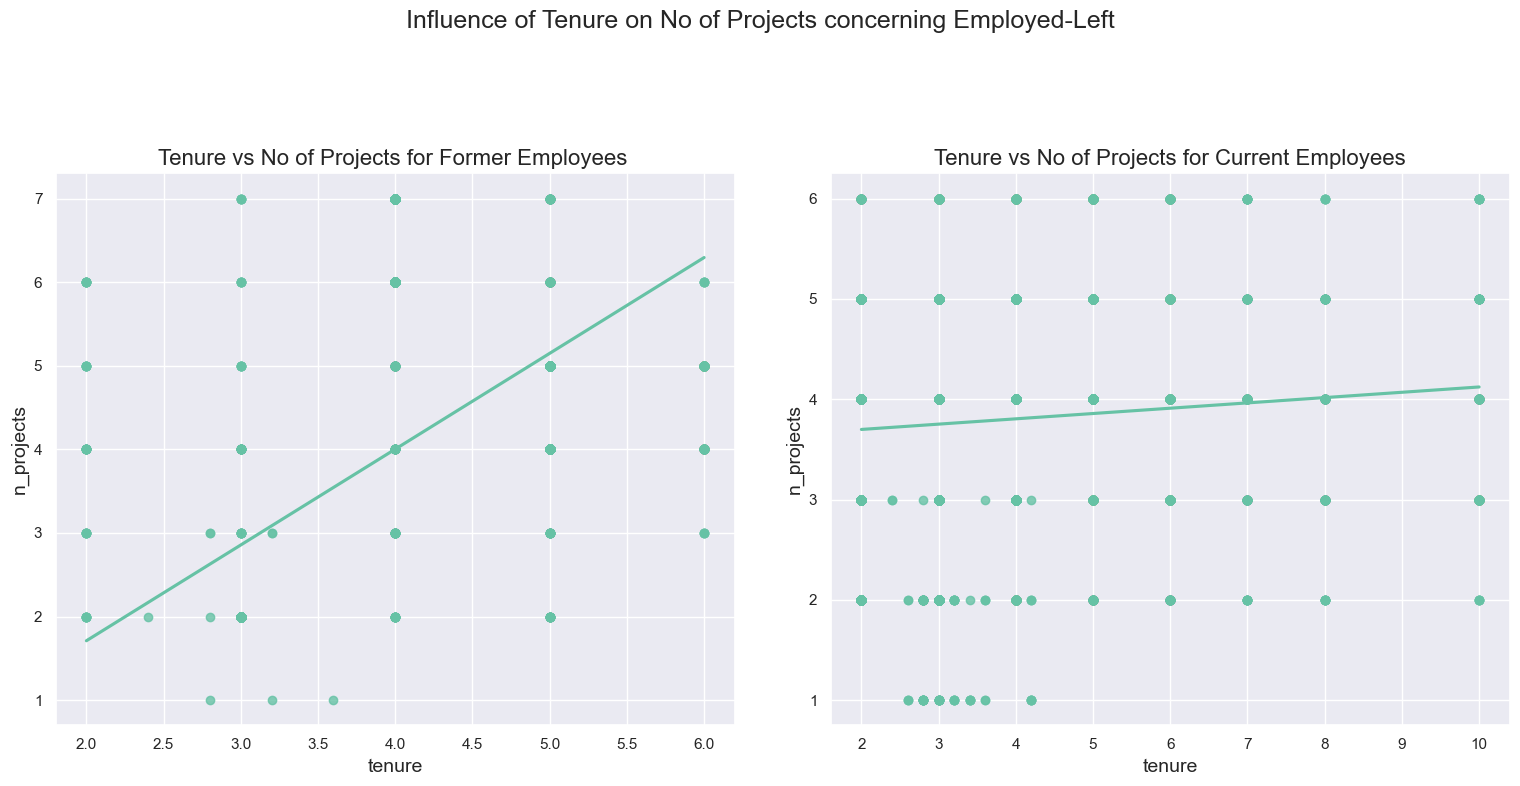

In [218]:

# Instantiate a figure of size of 16 x 8 inches with 6 subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

#Create plots
sns.regplot(x='tenure', y='n_projects', data=emp_train[emp_train['status']=='Left'], ax=ax[0], ci=None)
sns.regplot(x='tenure', y='n_projects', data=emp_train[emp_train['status']=='Employed'], ax=ax[1], ci=None)

# Adding some cosmetics - ticks, labels, title, legend and grid.
ax[0].set_title(label='Tenure vs No of Projects for Former Employees ', fontsize=16)
ax[1].set_title(label='Tenure vs No of Projects for Current Employees', fontsize=16)

for axes in ax:
  axes.set_ylabel(ylabel='n_projects', size=14)
  axes.set_xlabel(xlabel='tenure', size=14)
  axes.grid(visible=True)

# Setting a super title for the plots
plt.suptitle(t='Influence of Tenure on No of Projects concerning Employed-Left', size=18, y=1.02)
plt.tight_layout(pad=3)
plt.show()

**<font size=4, color=#196F3D>Interpretation: Reg Plot between Tenure and No of Projects for Employed/Left**

** Who Left**

- **Linearity between Tenure and No of Projects who Left.**
- **Employees were efficient and consistent in taking more no.of Projects with the increase in Experience**
- **3,4, 5 years exp. took max. of 7 projects**
    
** Employed**
- **No linearity is seen between Tenure and No of Proects for Employed**
- **They are not taking up more projects with their incresed Experince level**
- **Took max. of 6 number of Projects even when employees have 8 and 10 years of Experience**
    
------------------------------------

### 14. Heat Map

<AxesSubplot:>

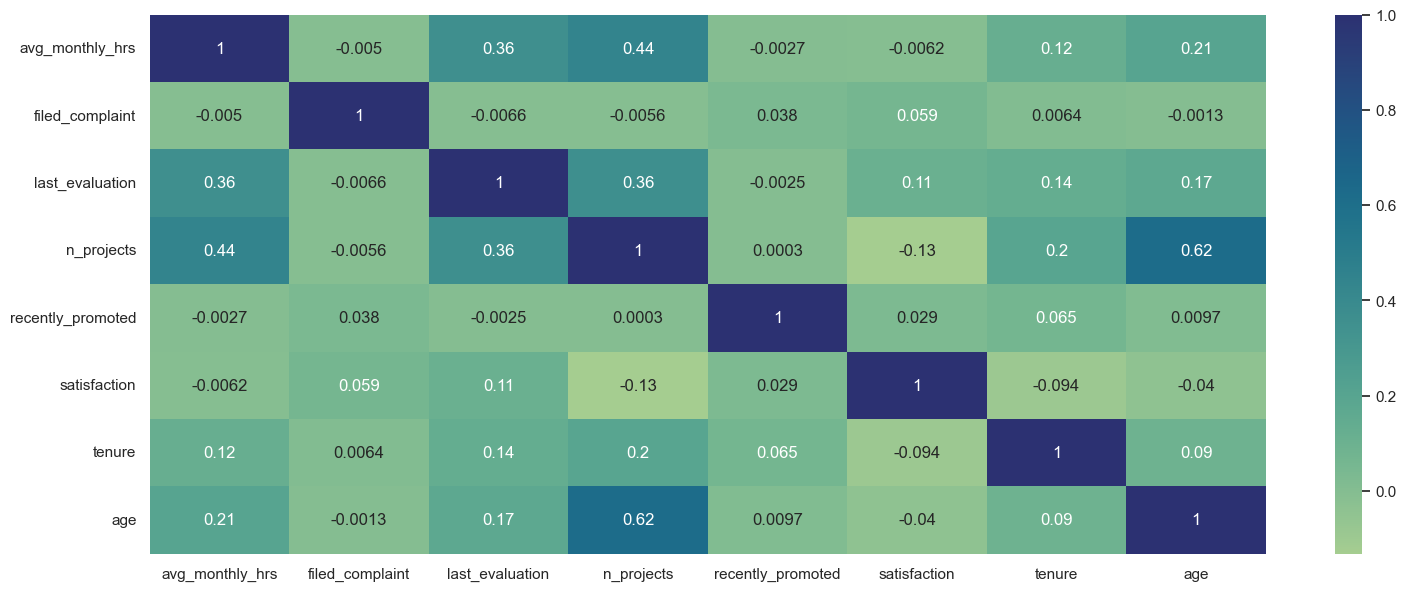

In [219]:
paper = plt.figure(figsize = [18,7])
sns.heatmap(emp_train.corr(), annot = True, cmap="crest")

**<font size=4, color=#196F3D>Interpretation: Heat Map**

- Correlation of Age and no of Projects is found 0.62.
- Age column has dropped for Model Buiding

    
------------------------------------

<a name = Section82></a>
## **8.3 Multivariate**

### 1. Scatter Plot for last_evaluation and avg_monthly_hours w.r.t Status(Employed/Left)

In [220]:
emp_train.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'age', 'gender',
       'marital_status', 'salary', 'status', 'department'],
      dtype='object')

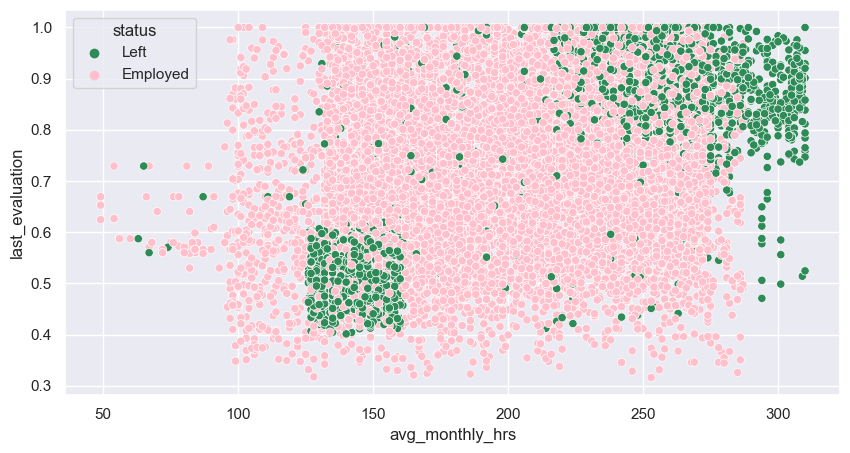

In [221]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.scatterplot(ax=ax, x=emp_train.avg_monthly_hrs,y=emp_train.last_evaluation, hue=emp_train.status, palette=['seagreen', 'pink'])


plt.show()

**<font size=4, color=#196F3D>Interpretation: Scatter Plot for last_evaluation and avg_monthly_hours w.r.t Status(Employed/Left)**

**Who are more likely to leave**
    
- last_evaluation with score 0.4 to 0.6 and avg working hours of 125 to 160
- last_evaluation with score 0.8 to 1.0 and avg working hours of 250 to 310
    

    
------------------------------------

### 2. Scatter Plot for satisfaction and last_evaluation w.r.t Status(Employed/Left)

<Figure size 1500x700 with 0 Axes>

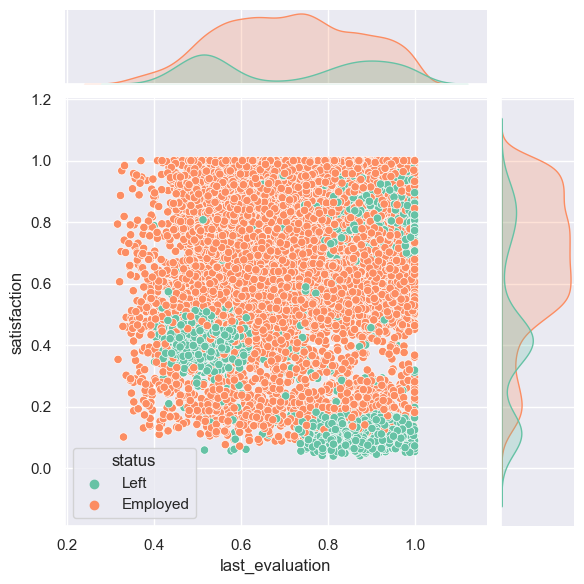

In [222]:
fig = plt.figure(figsize=(15, 7))
sns.jointplot(x="last_evaluation", y="satisfaction",data=emp_train, hue='status')
plt.show()

**<font size=4, color=#196F3D>Interpretation: Scatter Plot for satisfaction and last_evaluation w.r.t Status(Employed/Left)**

- For Last Eval Score from 0.4-0.6 and Satisfaction of 0.3-0.5
- For Last Eval Score from 0.8-1.0 and Satisfaction of 0.1-0.2 
- For Last Eval Score from 0.8-1.0 and Satisfaction of 0.7-0.9 

    
------------------------------------

### 3. Scatter Plot for satisfaction and avg_monthly_hrs w.r.t Status(Employed/Left)

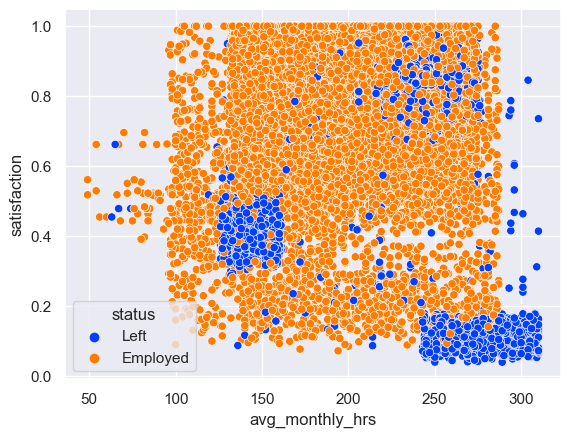

In [223]:
sns.scatterplot(
    x='avg_monthly_hrs',
    y='satisfaction', 
    data=emp_train,
    palette='bright',
    hue='status');

**<font size=4, color=#196F3D>Interpretation:Scatter Plot for satisfaction and avg_monthly_hrs w.r.t Status(Employed/Left)**
    
**Who Left?**
- **Who worked either for lesser no. of hours(125- 160) hours or worked for longer hours(310 hours)**
- **Fewer worked for 200 to 300  hours. Also has a satisfaction of 0.7 to 1.0 but still left**

### 4. n_projects v/s Satisfaction w.r.t. Left/Employed Status

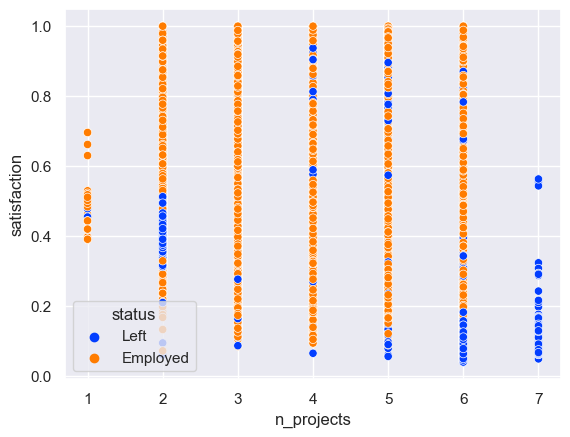

In [225]:
sns.scatterplot(
    x='n_projects',
    y='satisfaction', 
    data=emp_train,
    palette='bright',
    hue='status');

**<font size=4, color=#196F3D>Interpretation:n_projects v/s Satisfaction w.r.t. Left/Employed Status**
    
**Who Left?**
- **who completed 7 no of projects were very less satisfied**-**No one sustained** 
- **few who completed 6 no of projects were also unsatisfied, therefore left**
- **who did 2 projects were also dissatisfied**

### 5. Tenure and Satisfaction w.r.t Left/Employed Status

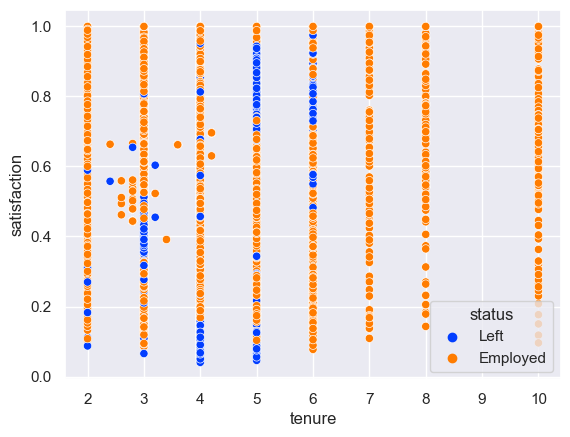

In [226]:
sns.scatterplot(
    x='tenure',
    y='satisfaction', 
    data=emp_train,
    palette='bright',
    hue='status');

**<font size=4, color=#196F3D>Interpretation:Tenure and Satisfaction w.r.t Left/Employed Status**
    
**Who Left?**
- **Majority With 5 years of exp. were satisfied , but still left**
- **With 6 years of exp. , it seems employees were satisfied , but still left**
- **Lower or Average satisfaction with tenure term of 3, 4,5 and 6 years can be seen**

In [227]:
def chisq(x,y):
  tab=pd.crosstab(x,y)
  stat,p,dof,expected = chi2_contingency(tab)
  print(stat)
  print(p)
  print(dof)
  print(expected)
  if p<0.05:
    print('Accept the Alternate Hpothesis', '%.2f' % p)
  else:
    print('Failed to reject the Null Hypothesis', round(p,2))
  return tab

In [228]:
chisq(emp_train['status'], emp_train['tenure'])

1617.458696464922
0.0
14
[[1.85373716e+03 2.28480340e+00 3.80800567e+00 2.97024442e+01
  3.69452710e+03 1.14240170e+01 4.56960680e+00 5.33120793e+00
  1.43257173e+03 6.85441020e+00 8.25575629e+02 3.99840595e+02
  1.10432164e+02 1.00531350e+02 1.18809777e+02]
 [5.80262841e+02 7.15196599e-01 1.19199433e+00 9.29755579e+00
  1.15647290e+03 3.57598300e+00 1.43039320e+00 1.66879207e+00
  4.48428268e+02 2.14558980e+00 2.58424371e+02 1.25159405e+02
  3.45678356e+01 3.14686504e+01 3.71902232e+01]]
Accept the Alternate Hpothesis 0.00


tenure    2.0   2.4   2.6   2.8   3.0   3.2   3.4   3.6   4.0   4.2   5.0   \
status                                                                       
Employed  2393     2     5    35  3647    12     6     6  1207     9   466   
Left        41     1     0     4  1204     3     0     1   674     0   618   

tenure    6.0   7.0   8.0   10.0  
status                            
Employed   379   145   132   156  
Left       146     0     0     0

### 6. Box Plot for recently_promoted & filed_complaint against 4  following features w.r.t Left/Employed Status
- satisfaction
- tenure

In [229]:
emp_train.columns

Index(['avg_monthly_hrs', 'filed_complaint', 'last_evaluation', 'n_projects',
       'recently_promoted', 'satisfaction', 'tenure', 'age', 'gender',
       'marital_status', 'salary', 'status', 'department'],
      dtype='object')

<AxesSubplot:xlabel='filed_complaint', ylabel='tenure'>

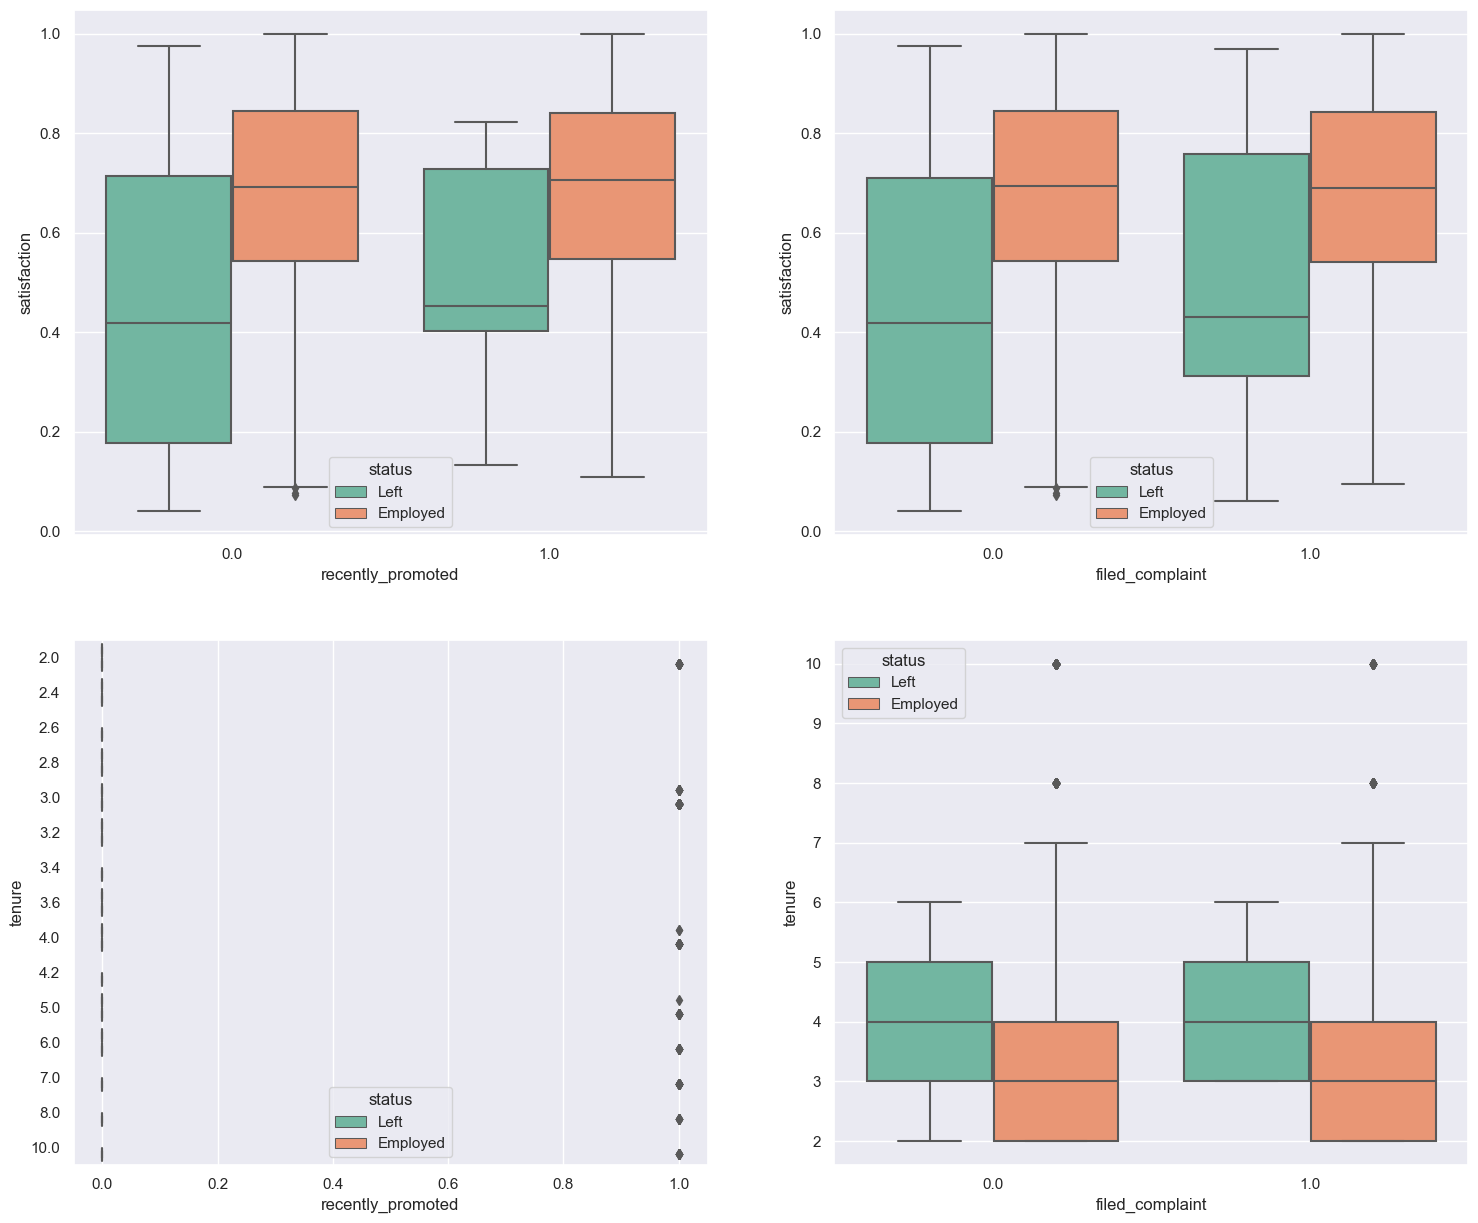

In [230]:
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(18,15))
sns.boxplot(ax = ax1[0],y=emp_train.satisfaction,x=emp_train.recently_promoted,hue=emp_train.status)
sns.boxplot(ax = ax1[1], y=emp_train.satisfaction, x=emp_train.filed_complaint, hue=emp_train.status)
sns.boxplot(ax = ax2[0], y=emp_train.tenure, x=emp_train.recently_promoted, orient='h', hue=emp_train.status)
sns.boxplot(ax = ax2[1], y=emp_train.tenure, x=emp_train.filed_complaint, hue=emp_train.status)

**<font size=4, color=#196F3D>Interpretation: Total Employees Percentage in Each department**
    
------------------------------------
    

### 7. PairPlot w.r.t Status

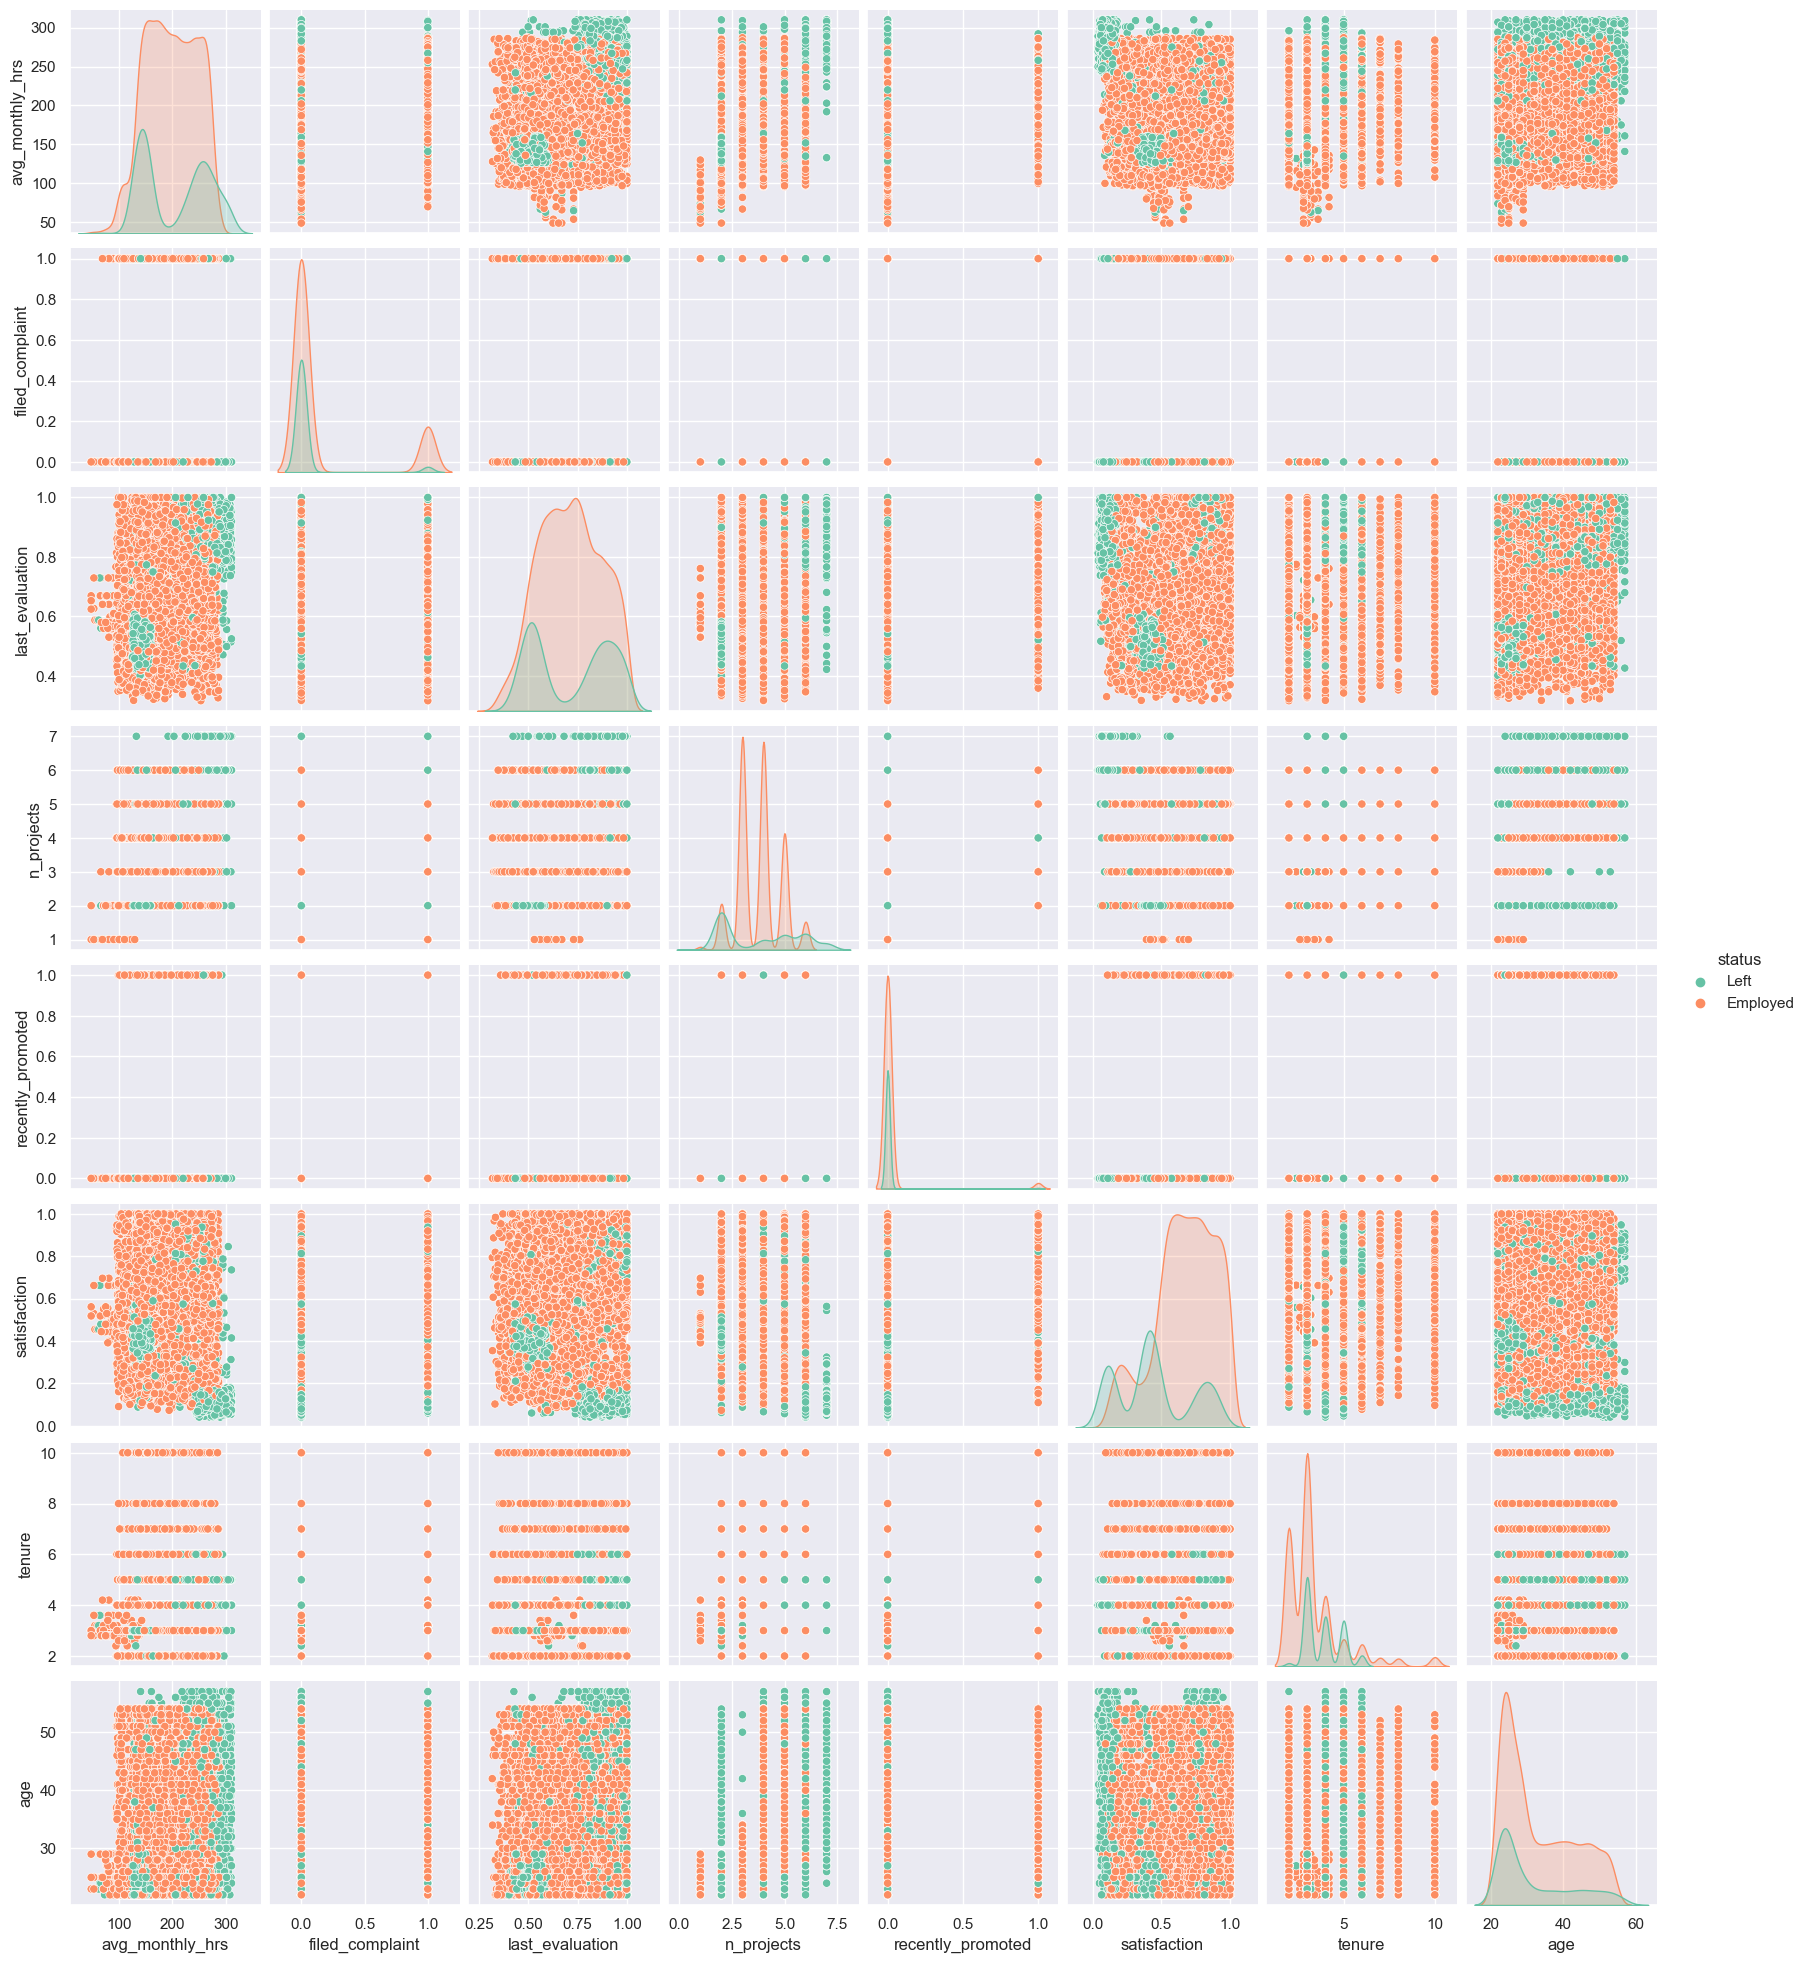

In [231]:
sns.pairplot(
    data=emp_train, 
    aspect=.85,
    hue='status');

<a name = Section9></a>

---
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Summary**

**Sales, Engineering and Support Departments together** constitute **61% of the total population**
- **Attrition percentage is** **maximum in Finance dept with 27.7% attrition rate**
- Following that Attrition percentage is **25.9% in Engineering** and approx. **24% each in the Sales and Support Departments** 
 
**Male Female Population Distribution** is **65.9% and 34.1%**
- Females have high Attrition Percentage** in comparison to Males

**14.5% Records are found for **filed complaints**
- **Max. Employees who left** belonged to who **did not file a complaint** 

**Promotions** are very less. Only 2.1 % got promoted 
- **Only 14 were promoted, which later left**
- **Majority of the Employees who left were never promoted**

**48.81% are low salaried and 43.07% are medium salaried**
- **Low Salaried Employees** are more frequent in **leaving than Medium and High Salaried ones**
- **Though 25% high Salaried class** has a **satisfaction score of below 0.5(Average)**

**Projects** 
- **Employees who left** did **Varied Range of Projects (as low as 1, max.7)** with an average of 4 Projects
- Company **could not retain** who did **max. of 7 projects**


**Avg. monthly Working Hours**
- Employees **who left** worked for long Hours with **median as 225 Avg. monthly working hours** &
- **max. of more than 300 avg. monthly working hours**

**Tenure** 
- Employees with 3, 4, 5, 6 years tenure can leave. 
- **With 5 years of exp.** more employees are **exiting than existing**.
- With **7, 8 and 9 years of experience**, employees are **not leaving**

**Tenure and No of Projects**
- **Who Left** - **With** each year adding on to their **experience, they took up more projects**
- This is why projects they **took up is 7.0(Max.) with 3.0,4.0, 5.0 or 6.0 years of exp.**
- No one in the **current worforce with 8, 9 or 10 years exp. took upto 7 projects** 

**Tenure and Stisfaction**
- **Majority With 5 years of exp. were satisfied , but still left**
- **With 6 years of exp. , it seems employees were satisfied , but still left**
- **Lower or Average satisfaction with tenure term of 3, 4,5 and 6 years can be seen*

**Last Evaluation** 
- **last_evaluation scores Range from  0.5 and 0.9 scores** for **Left Employees**
- employees with **Last evaluation scores as 0.4 to 0.6** worked for 
  **125 to 160 avg montly hours** have a
  **Satisfaction score of 0.3-0.5**

- With **Last evaluation scores as 0.8 to 1.0**  worked for
  **250 to 310 avg monthly hours** have a
  **Satisfaction of 0.1-0.2** 
  
- **Still Left**- **Last evaluation scores as 0.8 to 1.0**-Worked for
  **long hours(200 to 300) avg montly hours** and Also has a
  **Satisfaction of 0.7-0.9** 
  




<a name = Section92></a>
### **9.2 Conclusion**

- Company **could not retain** who did **max. of 7 projects**
- Employees who worked for Long Hours and Max no of Projects were not satisfied
- Employees who worked for less hours resulted in average last_evaluation score which 
  eventually lead to dissatisfaction amongst Employees
- Fewer Employees were doing good in their career with a good last_evaluation scores 
  and employees were satisfied, still they left.
- More Employees with tenure term of 5 years are exiting than existing though they are satisfied
- With Tenure term of 7, 8 and 9 years, employees are still working.
- Dissatisfaction is the major cause of leaving the company, Below 0.5 score will surely leave the company 
- Who has left , they were performing good in term of projects done and Average monthly hours.
- Low Salaried are leaving more
- Cause of Dissatisfaction seems low slaries and not enough promotions


<a name = Section93></a>
### **9.3 Actionable Insights**

- **Promotions** should be considered.

- **Decent Pay Scale according to exp., skillset and tenure should be competitive in Market**

- **Transparency in discussion at the time of yearly increments**

- **Based on Performance must get rewards, good overtime pay, increments, appreciation**

- **Counselling from time to time w.r.t career/skills growth, opportunities in a company**

- **Prior knowledge of Employees Attrition will help HR person to take proactive steps towards employees Retention**

- **Employees satisfaction Surveys can be conducted**. With this approach, reasons behind dissatisfaction could be known in    
  advance vfor which discussions and meetings could be held


In the end, Goal should be to maintain a **higher satisfaction level among Employees**.



